# Kite Circuit

In this notebook, we try to reproduce the result of the ["Magnifying Quantum Phase Fluctuations with Cooper-Pair Pairing"](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.12.021002) paper.

## Introduction

[Smith2022](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.12.021002) designed a superconducting circuit that maginfies quantum phase fluctuations with Cooper-pair pairing. We reproduced the energy spectrum of the Kite circuit. The diagram of the circuit is

<img src="pics/kite_pic1.png" width="300" align="left"/>

The parameters for these device in gigahertz unit are as following

<img src="pics/kite_pic2.png" width="450" align="left"/>

## Circuit Description

Firstly, we import the SQcircuit and the relavant libraries

In [1]:
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt

We define the two inductive loops of the circuit via `Loop` class. `loop1` represents $\theta_\text{ext}$ and `loop2` represents $\varphi_\text{ext}$.

In [2]:
# theta_ext:
loop1 = sq.Loop()
# phi_ext:
loop2 = sq.Loop()

The elements of the circuit can be defined via `Capacitor`, `Inductor`, and `Junction` classes in SQcircuit, and to define the circuit, we use the `Circuit` class. 

In [3]:
C = sq.Capacitor(2.5)
CJ = sq.Capacitor(6.6)
JJ1 = sq.Junction(5.9, loops =[loop1])
JJ2 = sq.Junction(5.9, loops =[loop1, loop2])
l1 = sq.Inductor(0.36, loops =[loop1])
l2 = sq.Inductor(0.36, loops =[loop1, loop2])
L = sq.Inductor(0.23, loops=[loop2])

elements = {
    (0, 1): [l1],
    (0, 2): [l2],
    (0, 3): [L, C],
    (1, 3): [JJ1, CJ],
    (2, 3): [JJ2, CJ]
}

kite = sq.Circuit(elements)

By creating an object of `Circuit` class, SQcircuit systematically finds the correct set of transformations and basis to make the circuit ready to be diagonalized.

Before setting the truncation numbers for each mode and diagonalizing the Hamiltonian, we can gain more insight into our circuit by calling the `description()` method. This prints out the Hamiltonian and a listing of the modes, whether they are harmonic or charge modes, and the frequency for each harmonic in GHz (the default unit). Moreover, it shows the prefactors in the Josephson junction part of the Hamiltonian $\tilde{\textbf{w}}_k$, which helps find the modes decoupled from the nonlinearity of the circuit.

In [4]:
kite.description()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

To determine the size of the Hilbert space, we specify the truncation number for each circuit mode via `set_trunc_nums()` method. Note that this is a necessary step before diagonalizing the circuit.

In [5]:
kite.set_trunc_nums([15,15,15])

## Circuit Spectrum

We calculate the spectrum of the circuit for $\theta_\text{ext}=0$ and sweep $\phi_\text{ext}$.

In [6]:
n_eig = 7
phi_ext = np.linspace(-0.25, 1.25, 30)

spec = np.zeros((n_eig, len(phi_ext)))

for i, phi in enumerate(phi_ext):
#     print(i)
    loop1.set_flux(0)
    loop2.set_flux(phi)
    spec[:, i], _ = kite.diag(n_eig=n_eig)

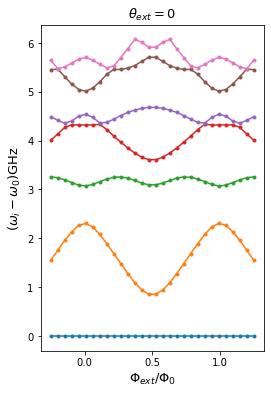

In [7]:
plt.figure(figsize=(4, 6))
for i in range(n_eig):
    plt.plot(phi_ext, (spec[i, :] - spec[0, :]), '.-')

plt.title(r"$\theta_{ext} = 0$", fontsize=13)
plt.xlabel(r"$\Phi_{ext}/\Phi_0$", fontsize=13)
plt.ylabel(r"($\omega_i-\omega_0$)GHz", fontsize=13)
plt.xticks([0, 0.5, 1])
plt.show()

We calculate the spectrum of the circuit for $\theta_\text{ext}=\pi$ and sweep $\phi_\text{ext}$.

In [8]:
n_eig = 7
phi_ext = np.linspace(-0.25, 1.25, 30)

spec = np.zeros((n_eig, len(phi_ext)))

for i, phi in enumerate(phi_ext):
#     print(i)
    loop1.set_flux(0.5)
    loop2.set_flux(phi)
    spec[:, i], _ = kite.diag(n_eig=n_eig)

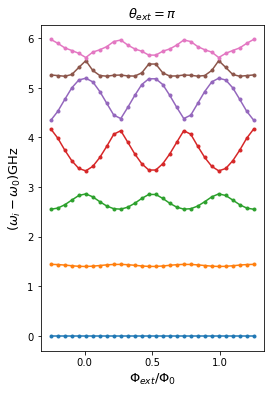

In [9]:
plt.figure(figsize=(4, 6))
for i in range(n_eig):
    plt.plot(phi_ext, (spec[i, :] - spec[0, :]), '.-')

plt.title(r"$\theta_{ext} = \pi$", fontsize=13)
plt.xlabel(r"$\Phi_{ext}/\Phi_0$", fontsize=13)
plt.ylabel(r"($\omega_i-\omega_0$)GHz", fontsize=13)
plt.xticks([0, 0.5, 1])
plt.show()

The next cell shows the spectrum from the figure 5 of the paper, which is the same spectrum that SQcircuit calculated for $\theta_\text{ext}=0$ and $\theta_\text{ext}=\pi$. 

<img src="pics/kite_pic3.png" width="750" align="left"/>